In [ ]:
pip install oracledb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.7 MB/s eta 0:00:00


In [ ]:
import oracledb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import config

warnings.filterwarnings("ignore", category=UserWarning)

connection = oracledb.connect(user=config.user, password=config.password,
                              dsn=config.dsn)
cursor = connection.cursor()

<ipython-input-59-0594a357d4fe>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = new_df.groupby(['E_GREEDY']).mean()


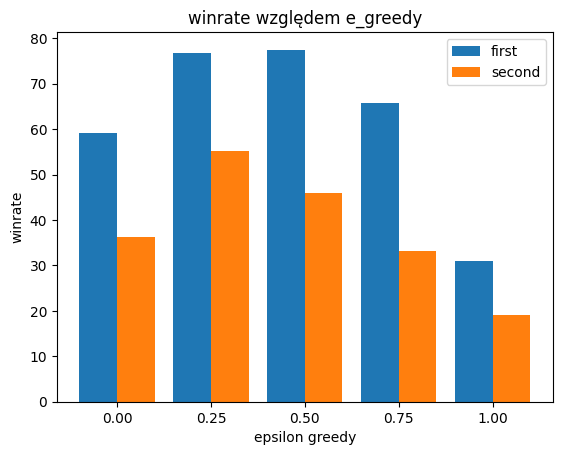

In [ ]:
df_vs_stats = pd.read_sql('select * from simulation_vs_stats', connection)
lista = [
    'MCTS_2_0_2_1,41',
    'MCTS_2_0,25_2_1,41',
    'MCTS_2_0,5_2_1,41',
    'MCTS_2_0,75_2_1,41',
    'MCTS_2_1_2_1,41'
]
new_df = df_vs_stats[df_vs_stats['SECONDARY_PARAMETER'].isin(lista)]
new_df = new_df.sort_values(by=['E_GREEDY'])
new_df = new_df.groupby(['E_GREEDY']).mean()

plt.bar([x - 0.05 for x in list(new_df.index)], [100 - x for x in new_df['SECOND_WINRATE']], width = 0.1, label='first')
plt.bar([x + 0.05 for x in list(new_df.index)], [100 - x for x in new_df['FIRST_WINRATE']], width = 0.1, label='second')
plt.xticks(list(new_df.index))
plt.legend()
plt.title(f'winrate względem e_greedy')
plt.xlabel('epsilon greedy')
plt.ylabel('winrate')
plt.show()

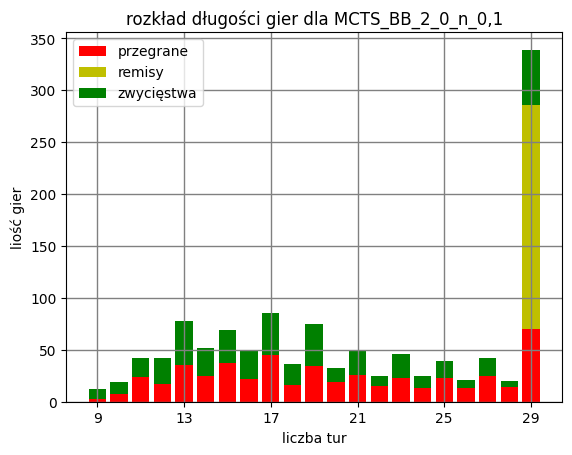

In [ ]:
df_turn_stats = pd.read_sql('select * from simulation_turn_stats', connection)
parameter = 'MCTS_BB_2_0_n_0,1'
df_filtered = df_turn_stats[(df_turn_stats.PARAMETER == parameter) & (df_turn_stats.WINS+df_turn_stats.DRAWS + df_turn_stats.LOSES> 10)]
df_filtered = df_filtered.sort_values(by=['TURN_CNT'])
plt.bar(df_filtered.TURN_CNT, df_filtered.LOSES, color='r')
plt.bar(df_filtered.TURN_CNT, df_filtered.DRAWS, bottom=df_filtered.LOSES, color='y')
plt.bar(df_filtered.TURN_CNT, df_filtered.WINS, bottom=df_filtered.LOSES+df_filtered.DRAWS, color='g')
plt.title(f'rozkład długości gier dla {parameter}')
plt.xticks(range(df_filtered.iloc[0]['TURN_CNT'], 30,4))
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(["przegrane", "remisy", "zwycięstwa"])
plt.xlabel('liczba tur')
plt.ylabel('liość gier')
plt.show()

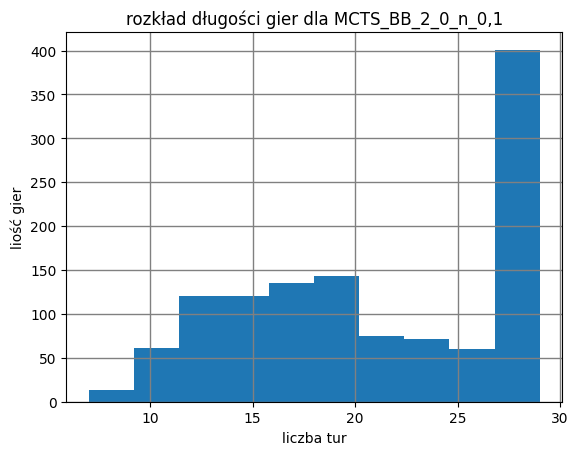

In [ ]:
df_turn_stats = pd.read_sql('select * from simulations', connection)
parameter = 'MCTS_BB_2_0_n_0,1'
df_filtered = df_turn_stats[(df_turn_stats.RED_PLAYER == parameter) | (df_turn_stats.BLUE_PLAYER == parameter)]
df_filtered = df_filtered.sort_values(by=['TURN_CNT'])
plt.hist(df_filtered.TURN_CNT)
# plt.plot(df_filtered.TURN_CNT, df_filtered.WINS + df_filtered.LOSES + df_filtered.DRAWS)
plt.title(f'rozkład długości gier dla {parameter}')
# plt.xlim([df_filtered.iloc[0]['TURN_CNT'], df_filtered.iloc[-1]['TURN_CNT']])
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('liczba tur')
plt.ylabel('liość gier')
plt.show()